In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
df_km = pd.read_csv('../../datasets/datasets_prepped/strc_km.csv', usecols=['varseq', 'cpm', 'count'])
df_kcat = pd.read_csv('../../datasets/datasets_prepped/strc_kcat.csv', usecols=['varseq', 'cpm', 'count'])

df_km = df_km[df_km['count'] > 500]
df_kcat = df_kcat[df_kcat['count'] > 500]

In [4]:
df_km = df_km.rename(columns={'count':'count_km', 'cpm':'cpm_km'})
df_kcat = df_kcat.rename(columns={'count':'count_kcat', 'cpm':'cpm_kcat'})

In [5]:
df_merged = df_km.merge(df_kcat, on='varseq', how='inner')

In [6]:
df_merged['p34'] = [s[15] for s in df_merged['varseq']]

In [9]:
#palette=['tab:blue', 'tab:green', 'tab:red']
palette=['tab:green', 'tab:blue', 'tab:red']

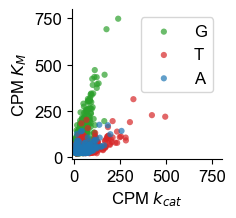

In [11]:
# Define absolute axis size in inches
axis_width = 1.5  # Width in inches
axis_height = 1.5  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
plt.scatter(df_merged[df_merged['p34'] == 'G']['cpm_kcat'], df_merged[df_merged['p34'] == 'G']['cpm_km'] , color='tab:green', s=20, alpha=0.7, marker='o', edgecolor='none', label='G', rasterized=True)
plt.scatter(df_merged[df_merged['p34'] == 'T']['cpm_kcat'], df_merged[df_merged['p34'] == 'T']['cpm_km'] , color='tab:red', s=20, alpha=0.7, marker='o', edgecolor='none', label='T', rasterized=True)
plt.scatter(df_merged[df_merged['p34'] == 'A']['cpm_kcat'], df_merged[df_merged['p34'] == 'A']['cpm_km'] , color='tab:blue', s=20, alpha=0.7, marker='o', edgecolor='none', label='A', rasterized=True)

plt.xlim(-10, 800)
plt.ylim(-10, 800)

plt.xticks([0, 250, 500, 750])
plt.yticks([0, 250, 500, 750])


plt.xlabel(r'CPM $k_{cat}$')
plt.ylabel(r'CPM $K_{M}$')

plt.legend()

sns.despine()
plt.savefig('p34_figure.svg', dpi=400)